In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

In [2]:
DEL= pd.read_excel(r'ML_course project.xlsx',sheet_name='damage')
Wave = pd.read_excel(r'ML_course project.xlsx',sheet_name='wave data')

In [3]:
D=[]
Hs=[]
Tp=[]
Tp1=[]
for i in range(len(Wave.iloc[:,0])):
    Hs.append(Wave.iloc[i,0])
    Tp.append(Wave.iloc[i,1]/2)
    Tp1.append(Wave.iloc[i,1])
    index=Wave.iloc[i,0]/0.05*201+(Wave.iloc[i,1]-2)/0.05
    D.append(DEL.iloc[int(index),2])
    
SHs=[]
STp=[]
SD=[]
for i in range(len(DEL.iloc[:,0])):
    SHs.append(DEL.iloc[i,0])
    STp.append(DEL.iloc[i,1])
    SD.append(DEL.iloc[i,2])

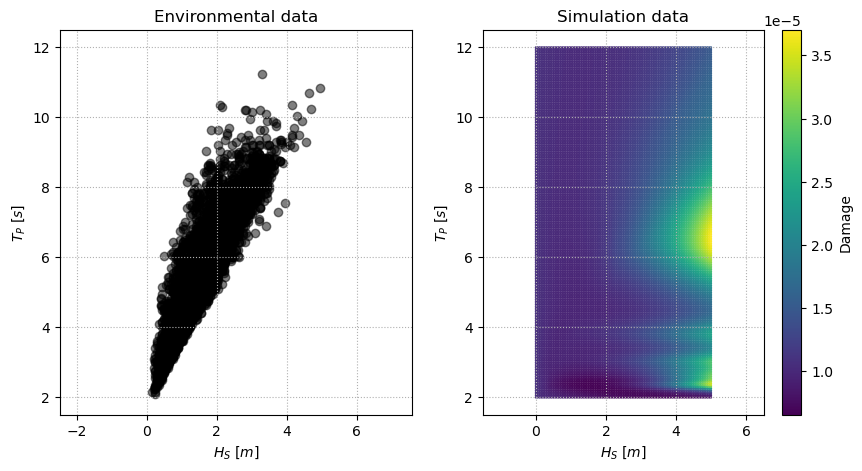

In [4]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].scatter(Hs, Tp1, color='k', alpha=0.5)
axs[0].set_title('Environmental data')
axs[0].grid(True, linestyle=':')
axs[0].set_xlabel('$H_S$ $[m]$')
axs[0].set_ylabel('$T_P$ $[s]$')
axs[0].axis('equal')
axs[0].set_ylim(1.5,12.5)

scatter=axs[1].scatter(SHs, STp, c=SD, cmap='viridis', s=0.5)
cbar=plt.colorbar(scatter,ax=axs[1],label='Damage')
axs[1].set_title('Simulation data')
axs[1].grid(True, linestyle=':')
axs[1].set_xlabel('$H_S$ $[m]$')
axs[1].set_ylabel('$T_P$ $[s]$')
axs[1].axis('equal');

# Exact solution

In [5]:
exact=np.mean(D)
print('Exact solution= {:.4e}'.format(exact))

Exact solution= 1.0243e-05


# Data

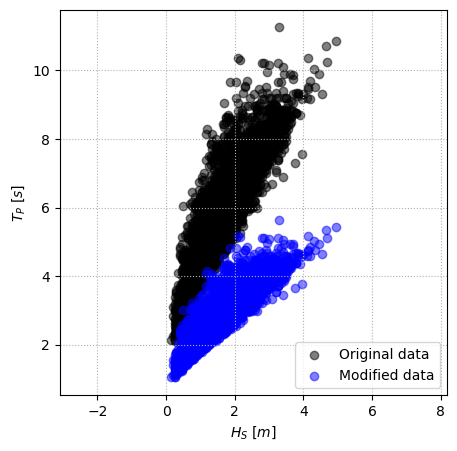

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(Hs, Tp1, color='k', alpha=0.5, label='Original data')
plt.scatter(Hs, Tp, color='b', alpha=0.5, label='Modified data')
plt.xlabel('$H_S$ $[m]$'); plt.ylabel('$T_P$ $[s]$')
plt.grid(axis='both', linestyle=':')
plt.legend(loc='lower right')
plt.axis('equal');

# PCA: modified data

In [58]:
X = np.array([list(Hs),list(Tp)]).T
model = PCA(n_components=2)
pca = model.fit(X)
X_save = model.transform(X)

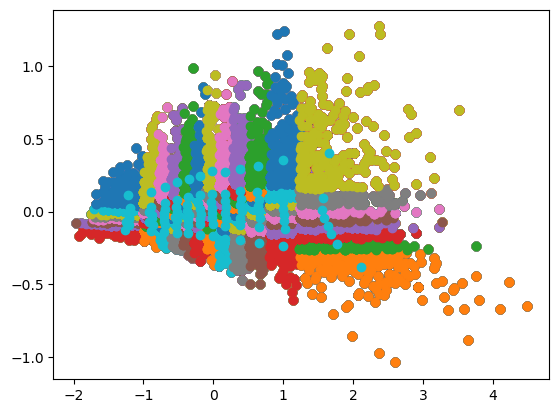

In [59]:
ymean=[]
xmean=[]
for m in range(10):
    for n in range(8):
        j=0
        gridx=3+m
        gridy=1+n
        H=X_save[:,0]
        T=X_save[:,1]
        D2=D
        H,T,D2= zip(*sorted(zip(H,T,D2)))
        RH=[]
        RT=[]
        ReD=[]
        #print(T,D2)
        for i in range(gridx):
            CH=H[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CT=T[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CD=D[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CT,CH,CD= zip(*sorted(zip(CT,CH,CD)))
            for j in range(gridy):
                DH=CH[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                DT=CT[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                DD=CD[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                plt.scatter(DH,DT)
                ReD.append(np.mean(DD))
                RH.append(np.mean(DH))
                RT.append(np.mean(DT))

        R=np.array([list(RH),list(RT)]).T
        # print(R[0])
        SS=(model.inverse_transform(R))
        SS[:,1]*=2
        # print(len(X_save[:,0]),j)
        Re=np.round(SS * 2,1) / 2
        # print(Re)
        plt.scatter(R[:,0],R[:,1])
        PCAD=[]
        for k in range(gridx*gridy):
            index=Re[k,0]/0.05*201+(Re[k,1]-2)/0.05
            PCAD.append(DEL.iloc[int(index),2])
        ymean.append(np.mean(PCAD))
        xmean.append(gridx*gridy)

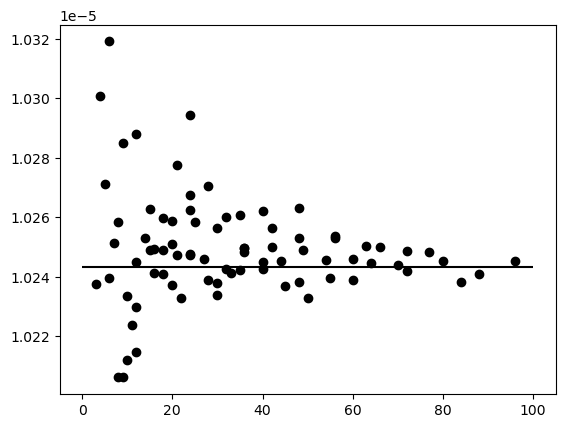

In [61]:
plt.hlines(exact,0,100,'k')
plt.scatter(xmean,ymean,color='k',edgecolor='k',label='PCA (modified)');

In [62]:
print(PCAD,ReD)
print((np.array(PCAD)-np.array(ReD))/np.array(ReD))

[9.49306435723254e-06, 9.51319623231214e-06, 9.49767163934785e-06, 9.494822934948871e-06, 9.496485750169373e-06, 9.493662291408209e-06, 9.497263060274646e-06, 9.536724858947803e-06, 9.650518171628078e-06, 9.666059182421083e-06, 9.623520861767929e-06, 9.621905155088716e-06, 9.612127885690624e-06, 9.588623819346276e-06, 9.580585892516889e-06, 9.529069310830162e-06, 9.776326688888736e-06, 9.6579659075822e-06, 9.6579659075822e-06, 9.622683145266608e-06, 9.591522867550362e-06, 9.563570512811775e-06, 9.506769806159859e-06, 9.482607723295818e-06, 9.66995147555167e-06, 9.590042876220826e-06, 9.504738420199922e-06, 9.504738420199922e-06, 9.46725777080979e-06, 9.464365238429107e-06, 9.456186576262998e-06, 9.487418713840236e-06, 9.503260287714512e-06, 9.461688139502367e-06, 9.455646887780017e-06, 9.451392015270729e-06, 9.44883931023349e-06, 9.449607827641852e-06, 9.469431695001547e-06, 9.508153747065488e-06, 9.483699720483153e-06, 9.496293932952661e-06, 9.510660292839779e-06, 9.513382368550026e-0

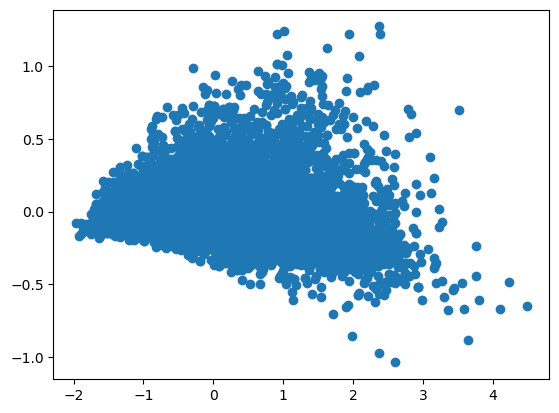

In [63]:
plt.scatter(X_save[:,0],X_save[:,1]);

# K-means (1) original data

In [75]:
X=list(zip(Hs,Tp1))
X=np.array(X)

k_values_org=list(range(2,100,2))

d_k_values_org=[]
for k in k_values_org:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # print(f"\n*Results for k={k} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)

    # plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    # plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    # plt.xlabel('$H_S$ $[m]$')
    # plt.ylabel('$T_P$ $[s]$')
    # plt.grid(axis='both', linestyle=':')
    # plt.axis('equal')
    # plt.show();

    # Damage at cluster centers
    #cluster_centers[:,1]*=2
    cluster_centers_dis = np.round(cluster_centers*2,1)/2
    damage_values = []
    for i in range(k):
        condition = ( SHs==cluster_centers_dis[i,0] ) & ( STp==cluster_centers_dis[i,1] )
        # print("Number of SD values: ",np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition]
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i.iloc[0,0]}")

    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current value of k
    d_k = np.sum( np.array(damage_values).flatten() * cluster_prob[:k] )
    d_k = np.sum( np.array(damage_values).flatten() * np.array(cluster_prob) )
    # print(f"Overall damage for k={k}: {d_k}")
    d_k_values_org.append(d_k)

print("\n**List of overall damage values for each k:")
print(d_k_values_org)


**List of overall damage values for each k:
[1.0149476615556559e-05, 1.0245503117477758e-05, 1.0206679555331085e-05, 1.0172612390937289e-05, 1.0218584426309536e-05, 1.0210701185706571e-05, 1.0210725982479623e-05, 1.0210271300489317e-05, 1.0190127555707513e-05, 1.0201300957941182e-05, 1.020080274391639e-05, 1.02183525078445e-05, 1.0215632748788552e-05, 1.0192710512951239e-05, 1.0215847019263227e-05, 1.0226548328847825e-05, 1.0221859335351615e-05, 1.0212562952007772e-05, 1.0210236767682714e-05, 1.0206304744203046e-05, 1.0225774814426882e-05, 1.0219293421025151e-05, 1.0230581326401884e-05, 1.022592577270362e-05, 1.0219767102986961e-05, 1.0225079443813888e-05, 1.0230906846051104e-05, 1.0232268149680625e-05, 1.0234377536925271e-05, 1.0228002064029783e-05, 1.0232793395648184e-05, 1.0229299423556673e-05, 1.0228173223078413e-05, 1.0231310775462077e-05, 1.0230085963935098e-05, 1.0230323968420074e-05, 1.0225200669026188e-05, 1.0240346332290786e-05, 1.024018569815711e-05, 1.0234033317919301e-05,

# K-means (2) modified data

In [76]:
X=list(zip(Hs,Tp))
X=np.array(X)

k_values_mod=list(range(2,100,2))

d_k_values_mod=[]
for k in k_values_mod:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # print(f"\n*Results for k={k} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)

    # plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    # plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    # plt.xlabel('$H_S$ $[m]$')
    # plt.ylabel('$T_P$ $[s]$')
    # plt.grid(axis='both', linestyle=':')
    # plt.axis('equal')
    # plt.show();

    # Damage at cluster centers
    cluster_centers[:,1]*=2
    cluster_centers_dis = np.round(cluster_centers*2,1)/2
    damage_values = []
    for i in range(k):
        condition = ( SHs==cluster_centers_dis[i,0] ) & ( STp==cluster_centers_dis[i,1] )
        # print("Number of SD values: ",np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition]
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i.iloc[0,0]}")

    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current value of k
    d_k = np.sum( np.array(damage_values).flatten() * cluster_prob[:k] )
    d_k = np.sum( np.array(damage_values).flatten() * np.array(cluster_prob) )
    # print(f"Overall damage for k={k}: {d_k}")
    d_k_values_mod.append(d_k)

print("\n**List of overall damage values for each k:")
print(d_k_values_mod)


**List of overall damage values for each k:
[1.0183618238272324e-05, 1.021500988673366e-05, 1.0206347424949846e-05, 1.0216613976452895e-05, 1.023672080204845e-05, 1.0244230743361044e-05, 1.0219798041402565e-05, 1.0228829383616567e-05, 1.022634101729277e-05, 1.023148106736643e-05, 1.0229428120431796e-05, 1.0235443586262185e-05, 1.0238123229371488e-05, 1.0234120217467656e-05, 1.0231695132493494e-05, 1.0233498476985351e-05, 1.0233576503896049e-05, 1.0231377404221202e-05, 1.022871309130537e-05, 1.0242262051541817e-05, 1.022593157476008e-05, 1.0243152051136732e-05, 1.0224488783204599e-05, 1.0239914817976915e-05, 1.0233559501112631e-05, 1.0238433973284637e-05, 1.0235333626886537e-05, 1.0235719737708696e-05, 1.024297711586139e-05, 1.0237157365789445e-05, 1.0242230089002961e-05, 1.0241783880325963e-05, 1.0250087448179593e-05, 1.0235967952096337e-05, 1.0236196820067544e-05, 1.0242506440603878e-05, 1.0241760434844838e-05, 1.023882073226691e-05, 1.0238122327002205e-05, 1.0238558248945998e-05, 1.

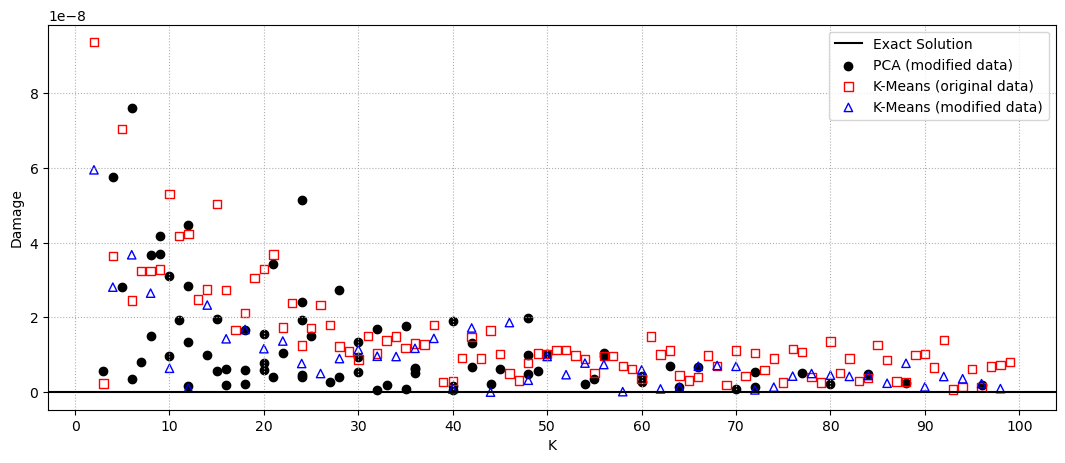

In [81]:
plt.figure(figsize=(13,5))
plt.axhline(y=0, color='k', linestyle='-', label='Exact Solution')
plt.scatter(xmean,np.abs(ymean-exact), color='k', edgecolor='k', marker='o', label='PCA (modified data)')
plt.scatter(k_values_org, np.abs(d_k_values_org-exact), color='none', edgecolor='r', marker='s', label='K-Means (original data)')
plt.scatter(k_values_mod, np.abs(d_k_values_mod-exact), color='none', edgecolor='b', marker='^', label='K-Means (modified data)')
plt.xlabel('K'); plt.ylabel('Damage')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.legend(); plt.grid(axis='both', linestyle=':'); plt.show();

# Mean-shift: original data

In [ ]:
import time
start_time = time.time()

# Mean shift

X = list(zip(Hs, Tp1))
X = np.array(X)

bandwidth_values = np.arange(0.5, 0.17, -0.01)

d_bandwidth_values = []
num_clusters = []
for bandwidth in bandwidth_values:
    # Mean Shift clustering
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    num_clusters.append(n_clusters_)
    # print(f"\n*Results for k={n_clusters_} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    plt.xlabel('$H_S$ $[m]$')
    plt.ylabel('$T_P$ $[s]$')
    plt.grid(axis='both', linestyle=':')
    plt.axis('equal')
    plt.show()

    # Damage at cluster centers
    cluster_centers = np.round(cluster_centers * 2, 1) / 2
    damage_values = []
    for i in range(len(cluster_centers)):
        condition = (SHs == cluster_centers[i, 0]) & (STp == cluster_centers[i, 1])
        # print("Number of SD values: ", np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition]
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i.iloc[0, 0]}")

    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current bandwidth
    d_bandwidth = np.sum(np.array(damage_values).flatten() * cluster_prob[:len(cluster_centers)])
    # print(f"Overall damage for bandwidth={bandwidth}: {d_bandwidth}")
    d_bandwidth_values.append(d_bandwidth)

print("\n**List of k:")
print(num_clusters)
print("\n**List of overall damage values for each bandwidth (or k):")
print(d_bandwidth_values)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total execution time: {elapsed_time} seconds")

# Silhouette score